# RESTAURANT SALES DATA ANALYSIS

### IMPORT LIBRARIES

In [2]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")


#### LOAD THE DATA

In [5]:
data=pd.read_csv(r"C:\Users\HP\Documents\9. Sales-Data-Analysis.csv")

In [6]:
data

,Order ID,Date,Product,Price,Quantity,Purchase Type,Payment Method,Manager,City
0,10452,07-11-2022,Fries,3.49,573.07,Online,Gift Card,Tom Jackson,London
1,10453,07-11-2022,Beverages,2.95,745.76,Online,Gift Card,Pablo Perez,Madrid
2,10454,07-11-2022,Sides & Other,4.99,200.40,In-store,Gift Card,Joao Silva,Lisbon
3,10455,08-11-2022,Burgers,12.99,569.67,In-store,Credit Card,Walter Muller,Berlin
4,10456,08-11-2022,Chicken Sandwiches,9.95,201.01,In-store,Credit Card,Walter Muller,Berlin
...,...,...,...,...,...,...,...,...,...
249,10709,28-12-2022,Sides & Other,4.99,200.40,Drive-thru,Gift Card,Walter Muller,Berlin
250,10710,29-12-2022,Burgers,12.99,754.43,Drive-thru,Gift Card,Walter Muller,Berlin
251,10711,29-12-2022,Chicken Sandwiches,9.95,281.41,Drive-thru,Gift Card,Walter Muller,Berlin
252,10712,29-12-2022,Fries,3.49,630.37,Drive-thru,Gift Card,Walter Muller,Berlin


#### DESCOVER THE DATA

In [8]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 254 entries, 0 to 253
Data columns (total 9 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Order ID        254 non-null    int64  
 1   Date            254 non-null    object 
 2   Product         254 non-null    object 
 3   Price           254 non-null    float64
 4   Quantity        254 non-null    float64
 5   Purchase Type   254 non-null    object 
 6   Payment Method  254 non-null    object 
 7   Manager         254 non-null    object 
 8   City            254 non-null    object 
dtypes: float64(2), int64(1), object(6)
memory usage: 18.0+ KB


#### DATA PREPROCESSING

In [12]:
data.Manager.unique()

array(['Tom      Jackson', '       Pablo Perez', 'Joao    Silva',
       'Walter Muller', 'Remy    Monet', 'Remy Monet',
       '       Remy Monet', 'Remy     Monet', 'Pablo Perez',
       'Pablo   Perez', 'Pablo  Perez', 'Pablo    Perez', 'Joao Silva',
       'Tom Jackson'], dtype=object)

In [16]:
data['Manager']=data.Manager.str.strip().str.replace(r'\s+',' ',regex=True)

In [17]:
data

,Order ID,Date,Product,Price,Quantity,Purchase Type,Payment Method,Manager,City
0,10452,07-11-2022,Fries,3.49,573.07,Online,Gift Card,Tom Jackson,London
1,10453,07-11-2022,Beverages,2.95,745.76,Online,Gift Card,Pablo Perez,Madrid
2,10454,07-11-2022,Sides & Other,4.99,200.40,In-store,Gift Card,Joao Silva,Lisbon
3,10455,08-11-2022,Burgers,12.99,569.67,In-store,Credit Card,Walter Muller,Berlin
4,10456,08-11-2022,Chicken Sandwiches,9.95,201.01,In-store,Credit Card,Walter Muller,Berlin
...,...,...,...,...,...,...,...,...,...
249,10709,28-12-2022,Sides & Other,4.99,200.40,Drive-thru,Gift Card,Walter Muller,Berlin
250,10710,29-12-2022,Burgers,12.99,754.43,Drive-thru,Gift Card,Walter Muller,Berlin
251,10711,29-12-2022,Chicken Sandwiches,9.95,281.41,Drive-thru,Gift Card,Walter Muller,Berlin
252,10712,29-12-2022,Fries,3.49,630.37,Drive-thru,Gift Card,Walter Muller,Berlin


##### removing duplicates

In [22]:
data.describe(include='object')

,Date,Product,Purchase Type,Payment Method,Manager,City
count,254,254,254,254,254,254
unique,53,5,3,3,5,5
top,09-11-2022,Chicken Sandwiches,Online,Credit Card,Tom Jackson,London
freq,5,52,107,120,75,75


In [19]:
data.duplicated().sum()

np.int64(0)

In [24]:
data.drop_duplicates(inplace=True)

In [25]:
data

,Order ID,Date,Product,Price,Quantity,Purchase Type,Payment Method,Manager,City
0,10452,07-11-2022,Fries,3.49,573.07,Online,Gift Card,Tom Jackson,London
1,10453,07-11-2022,Beverages,2.95,745.76,Online,Gift Card,Pablo Perez,Madrid
2,10454,07-11-2022,Sides & Other,4.99,200.40,In-store,Gift Card,Joao Silva,Lisbon
3,10455,08-11-2022,Burgers,12.99,569.67,In-store,Credit Card,Walter Muller,Berlin
4,10456,08-11-2022,Chicken Sandwiches,9.95,201.01,In-store,Credit Card,Walter Muller,Berlin
...,...,...,...,...,...,...,...,...,...
249,10709,28-12-2022,Sides & Other,4.99,200.40,Drive-thru,Gift Card,Walter Muller,Berlin
250,10710,29-12-2022,Burgers,12.99,754.43,Drive-thru,Gift Card,Walter Muller,Berlin
251,10711,29-12-2022,Chicken Sandwiches,9.95,281.41,Drive-thru,Gift Card,Walter Muller,Berlin
252,10712,29-12-2022,Fries,3.49,630.37,Drive-thru,Gift Card,Walter Muller,Berlin


In [27]:
data.describe()

,Order ID,Price,Quantity
count,254.000000,254.000000,254.000000
mean,10584.133858,7.102323,460.611457
std,75.889181,4.341855,214.888699
min,10452.000000,2.950000,200.400000
25%,10520.250000,3.490000,201.010000
50%,10583.500000,4.990000,538.880000
75%,10649.750000,9.950000,677.440000
max,10713.000000,29.050000,754.430000


In [29]:
data['Order ID'].duplicated().sum()

np.int64(0)

In [ ]:
data.drop([21,15],inplace=True)

#### check data types

In [31]:
data.dtypes

Order ID            int64
Date               object
Product            object
Price             float64
Quantity          float64
Purchase Type      object
Payment Method     object
Manager            object
City               object
dtype: object

In [34]:
data['Order ID']=data['Order ID'].astype('int')

In [35]:
data.dtypes

Order ID            int64
Date               object
Product            object
Price             float64
Quantity          float64
Purchase Type      object
Payment Method     object
Manager            object
City               object
dtype: object

In [42]:
data.Quantity=data.Quantity.astype('float')

In [43]:
data.Quantity=data.Quantity.round()

In [44]:
data.Quantity=data.Quantity.astype('int')

In [45]:
data

,Order ID,Date,Product,Price,Quantity,Purchase Type,Payment Method,Manager,City
0,10452,07-11-2022,Fries,3.49,573,Online,Gift Card,Tom Jackson,London
1,10453,07-11-2022,Beverages,2.95,745,Online,Gift Card,Pablo Perez,Madrid
2,10454,07-11-2022,Sides & Other,4.99,200,In-store,Gift Card,Joao Silva,Lisbon
3,10455,08-11-2022,Burgers,12.99,569,In-store,Credit Card,Walter Muller,Berlin
4,10456,08-11-2022,Chicken Sandwiches,9.95,201,In-store,Credit Card,Walter Muller,Berlin
...,...,...,...,...,...,...,...,...,...
249,10709,28-12-2022,Sides & Other,4.99,200,Drive-thru,Gift Card,Walter Muller,Berlin
250,10710,29-12-2022,Burgers,12.99,754,Drive-thru,Gift Card,Walter Muller,Berlin
251,10711,29-12-2022,Chicken Sandwiches,9.95,281,Drive-thru,Gift Card,Walter Muller,Berlin
252,10712,29-12-2022,Fries,3.49,630,Drive-thru,Gift Card,Walter Muller,Berlin


In [37]:
data.Quantity

0      573
1      745
2      200
3      569
4      201
      ... 
249    200
250    754
251    281
252    630
253    677
Name: Quantity, Length: 254, dtype: int64

In [48]:
data.Date=pd.to_datetime(data.Date,format="%d-%m-%Y")

In [49]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 254 entries, 0 to 253
Data columns (total 9 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   Order ID        254 non-null    int64         
 1   Date            254 non-null    datetime64[ns]
 2   Product         254 non-null    object        
 3   Price           254 non-null    float64       
 4   Quantity        254 non-null    int64         
 5   Purchase Type   254 non-null    object        
 6   Payment Method  254 non-null    object        
 7   Manager         254 non-null    object        
 8   City            254 non-null    object        
dtypes: datetime64[ns](1), float64(1), int64(2), object(5)
memory usage: 18.0+ KB


In [50]:
data.columns

Index(['Order ID', 'Date', 'Product', 'Price', 'Quantity', 'Purchase Type',
       'Payment Method', 'Manager', 'City'],
      dtype='object')

In [51]:
data["Revenue"] = data["Price"] * data["Quantity"]


### EDA

In [52]:
data.columns

Index(['Order ID', 'Date', 'Product', 'Price', 'Quantity', 'Purchase Type',
       'Payment Method', 'Manager', 'City', 'Revenue'],
      dtype='object')

#### HISTGRAM TO SHOW FEATURES DISTRIBUTIONS

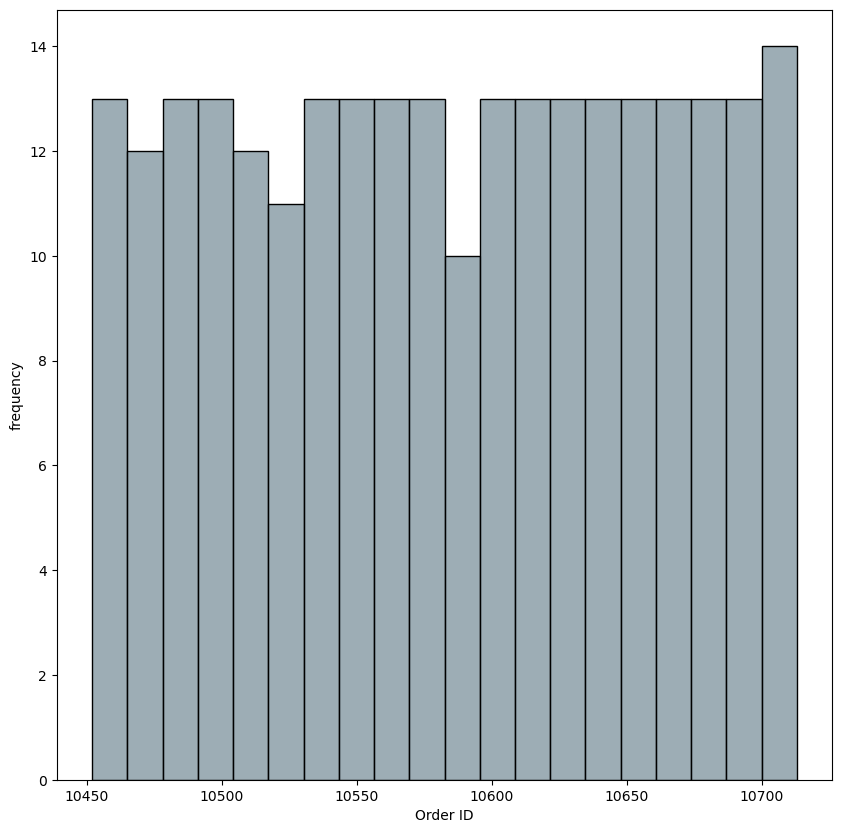

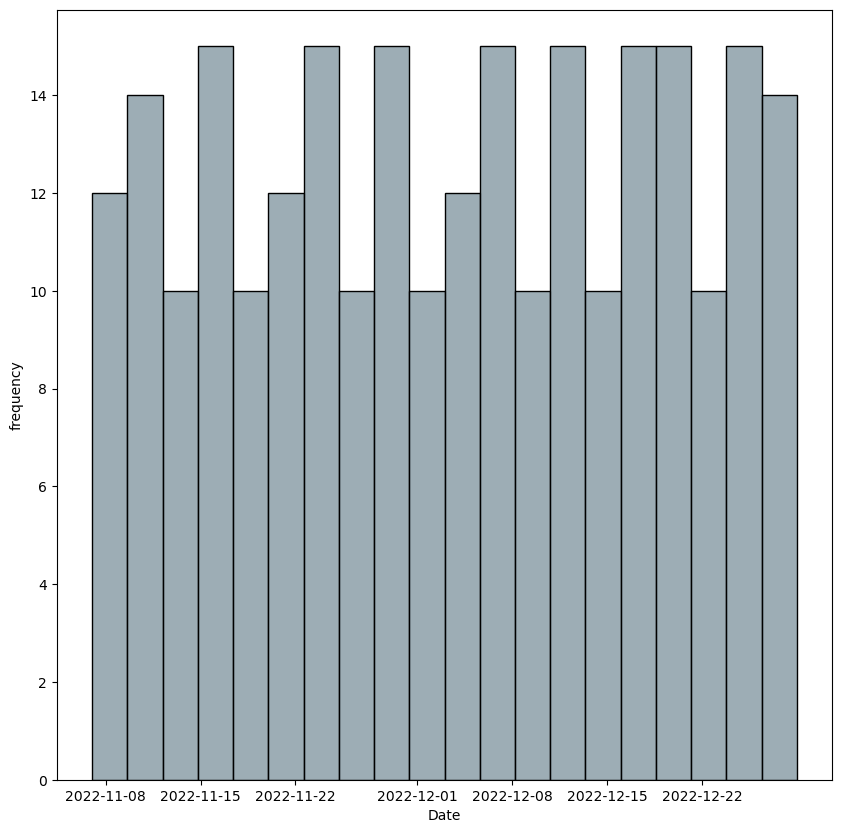

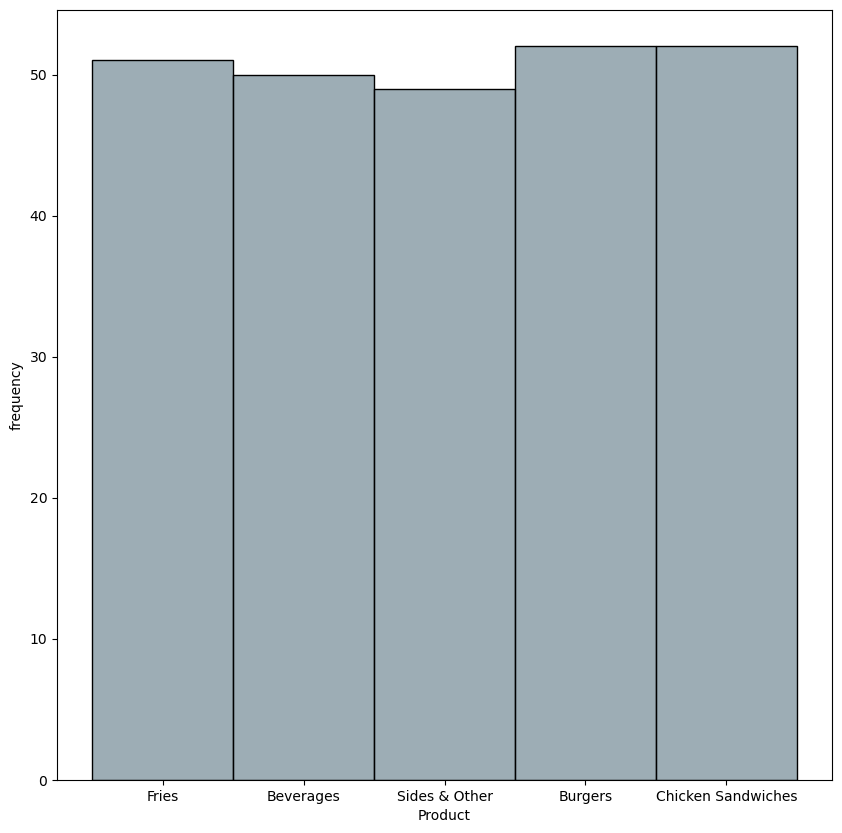

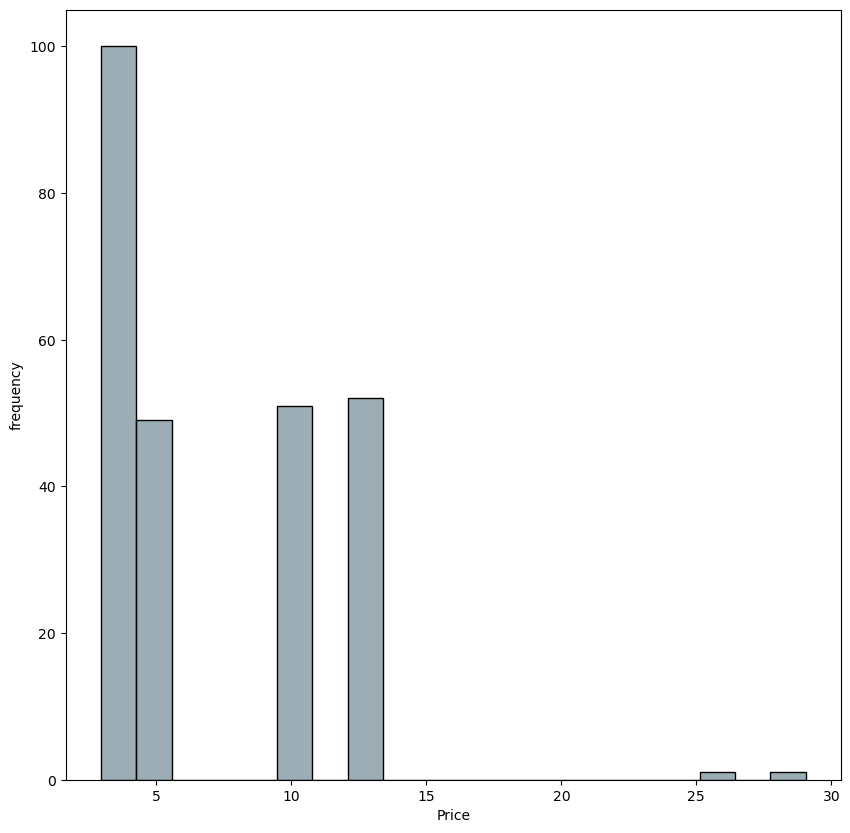

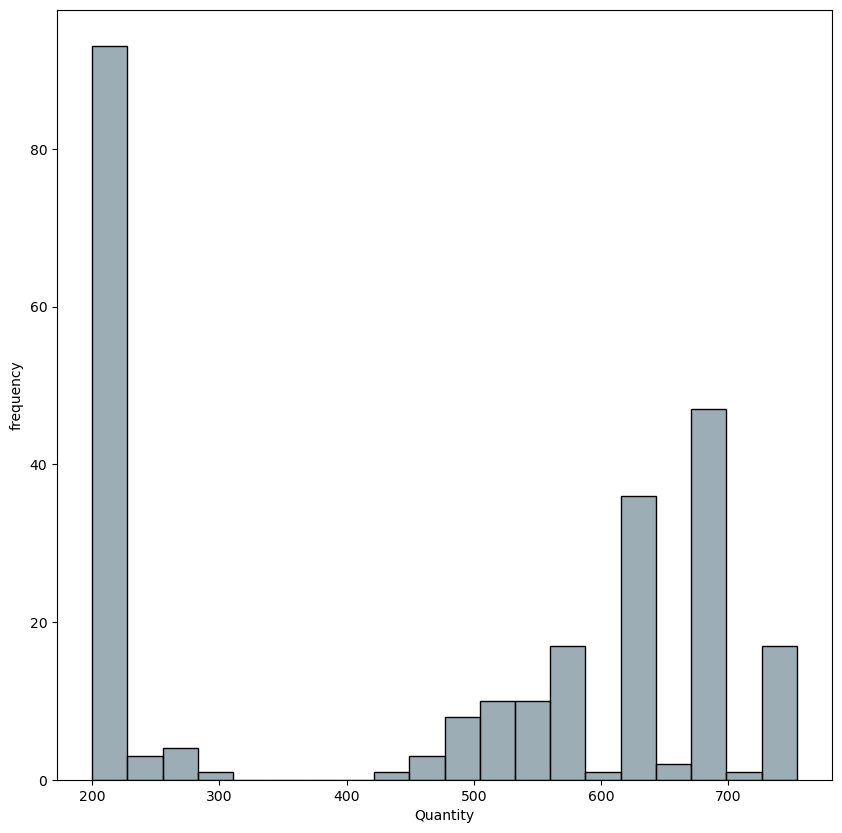

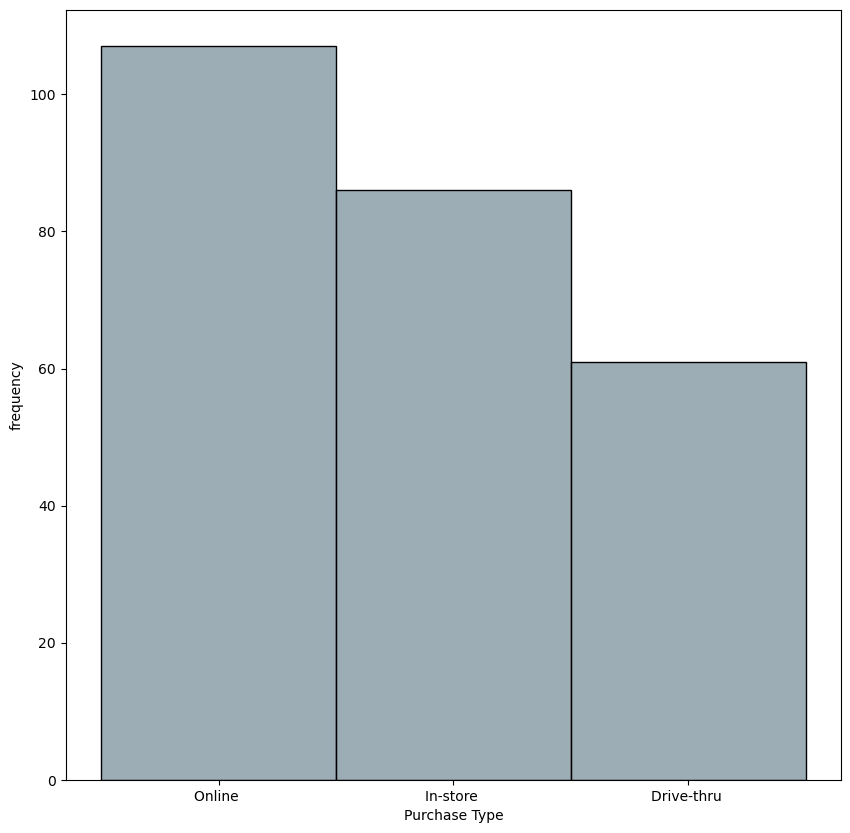

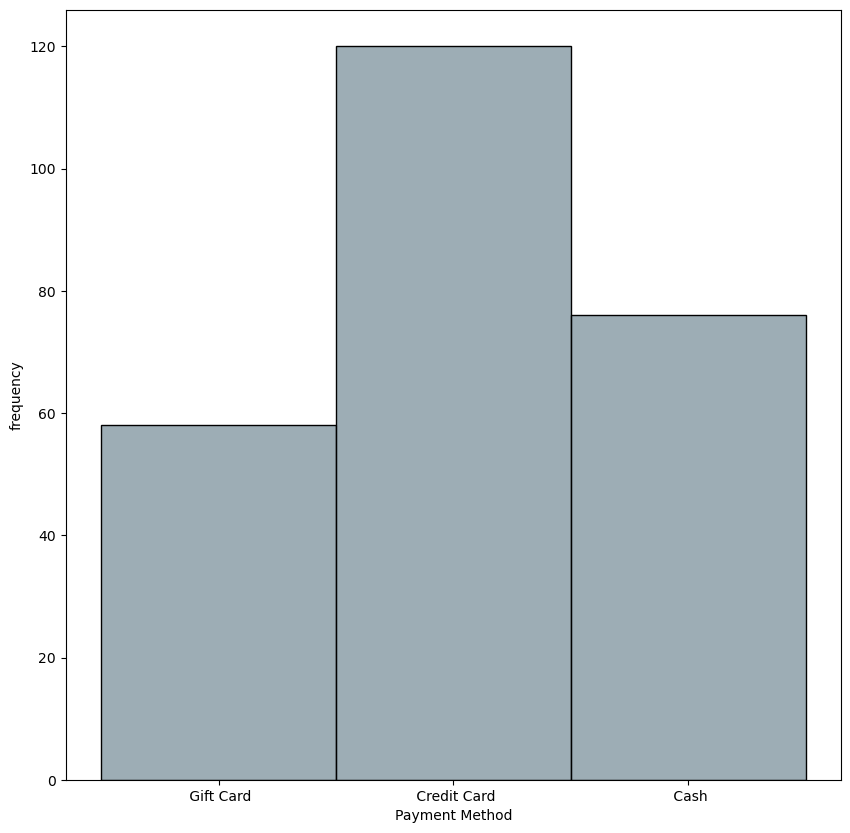

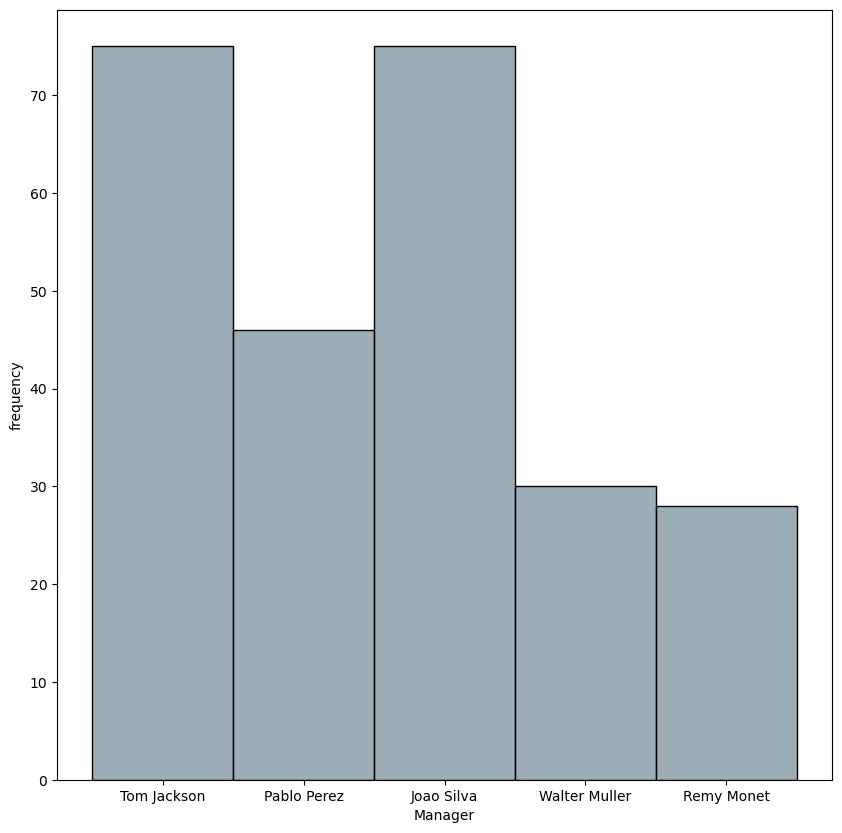

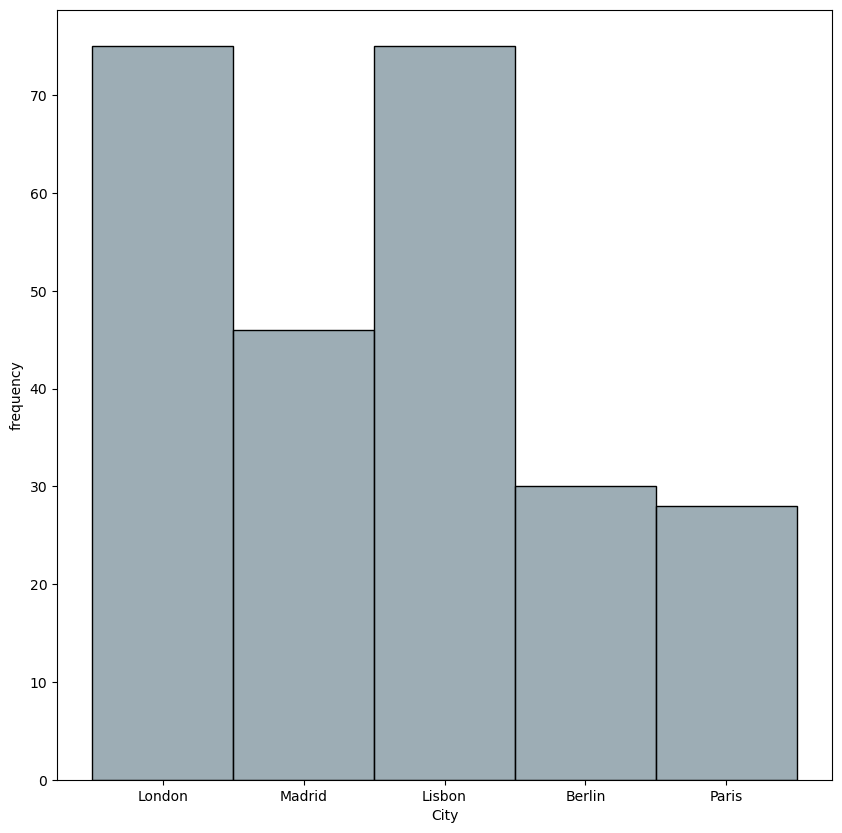

In [62]:
for i in ['Order ID', 'Date', 'Product', 'Price', 'Quantity', 'Purchase Type','Payment Method', 'Manager', 'City']:
    plt.figure(figsize=(10,10))
    sns.histplot(data=data,x=i,color='#7C929C',bins=20)
    
    plt.ylabel("frequency")
    plt.show()

#### BOX PLOT TO SHOW FEATURES OUTIERS

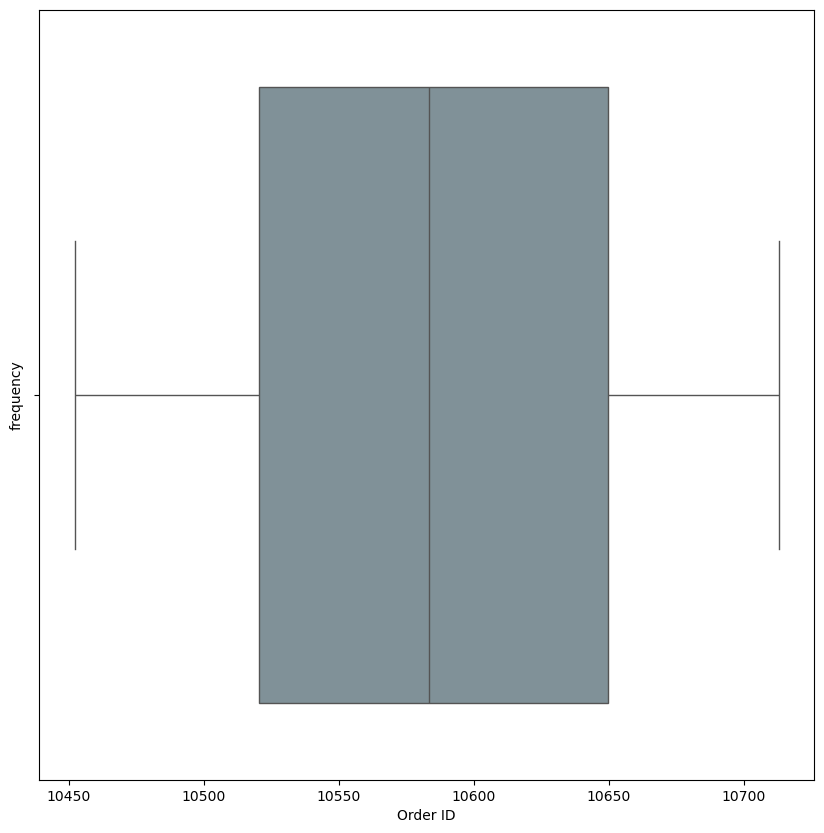

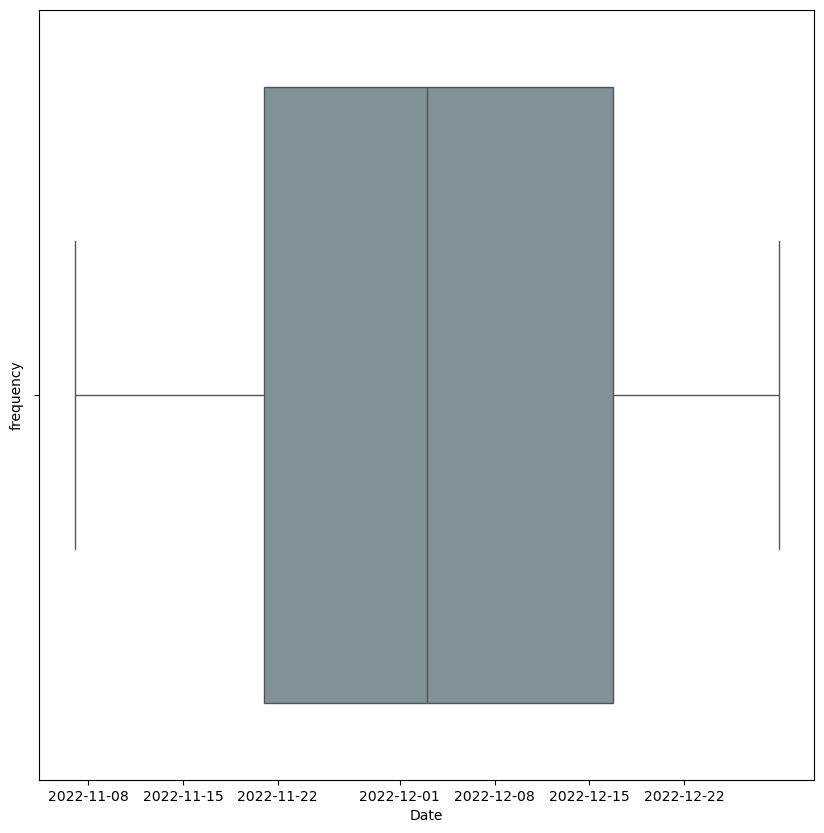

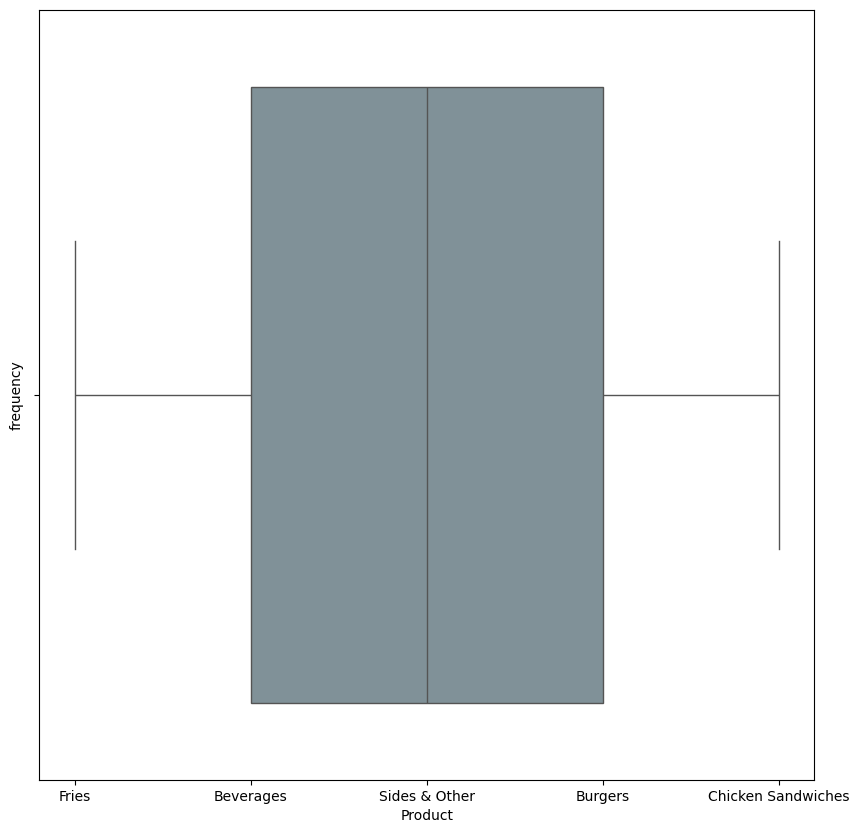

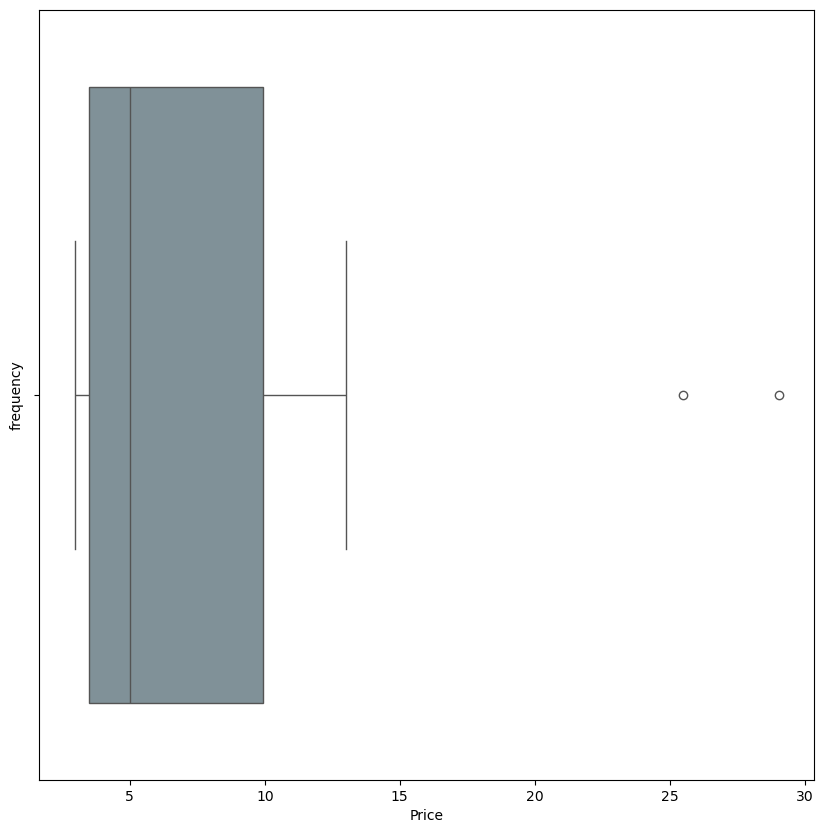

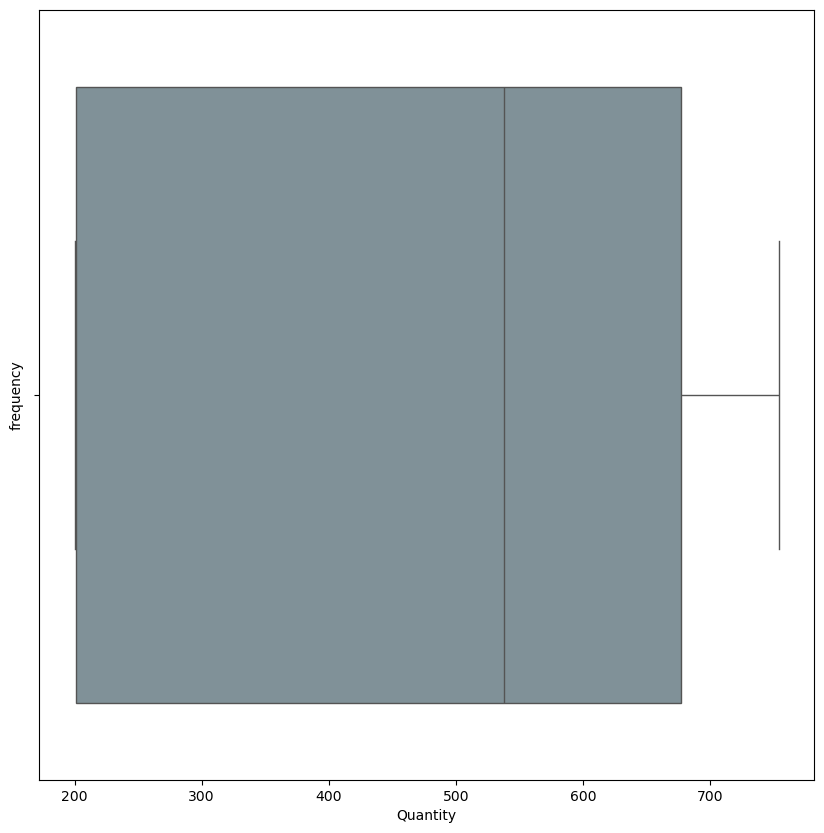

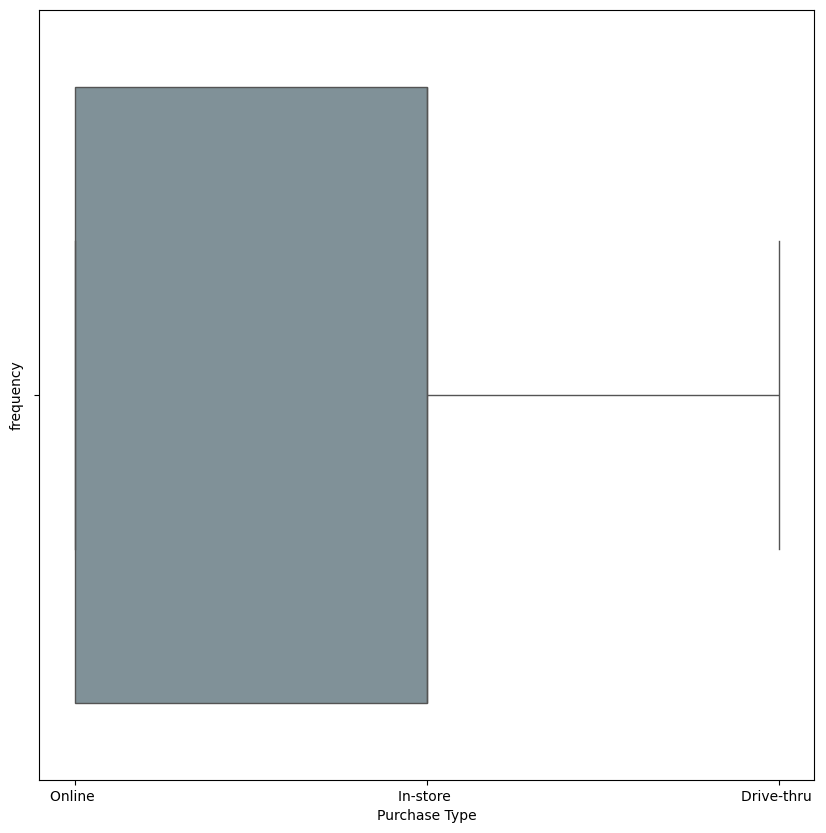

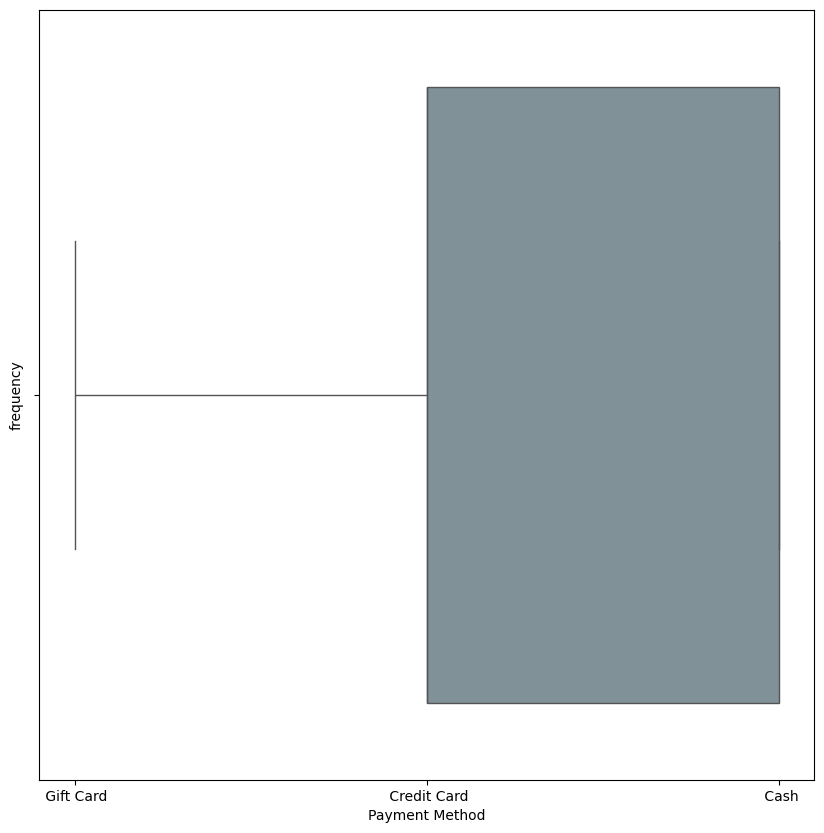

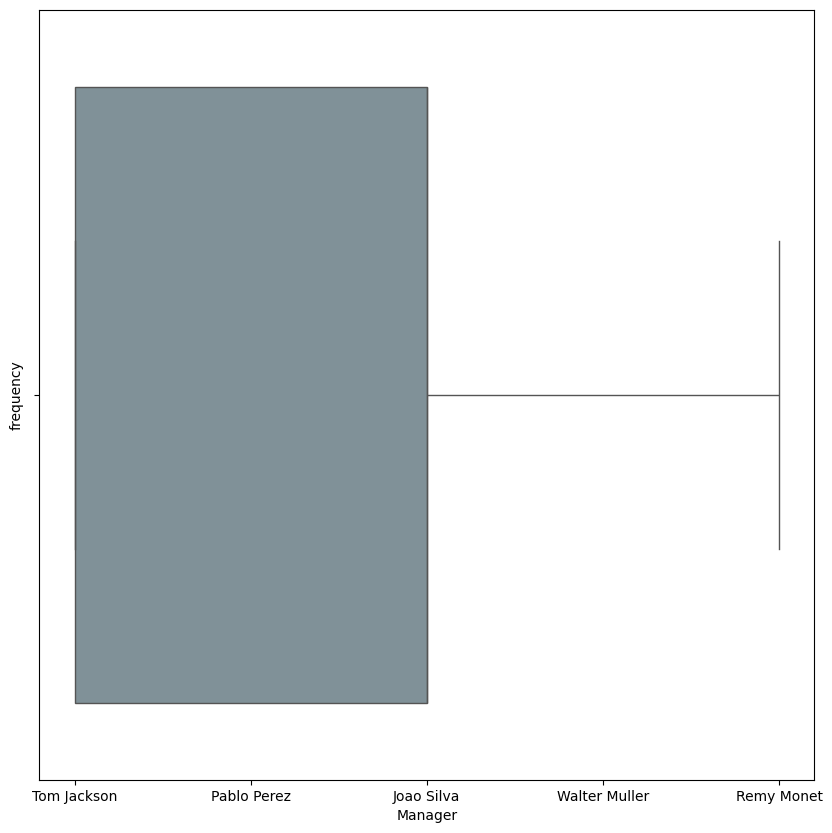

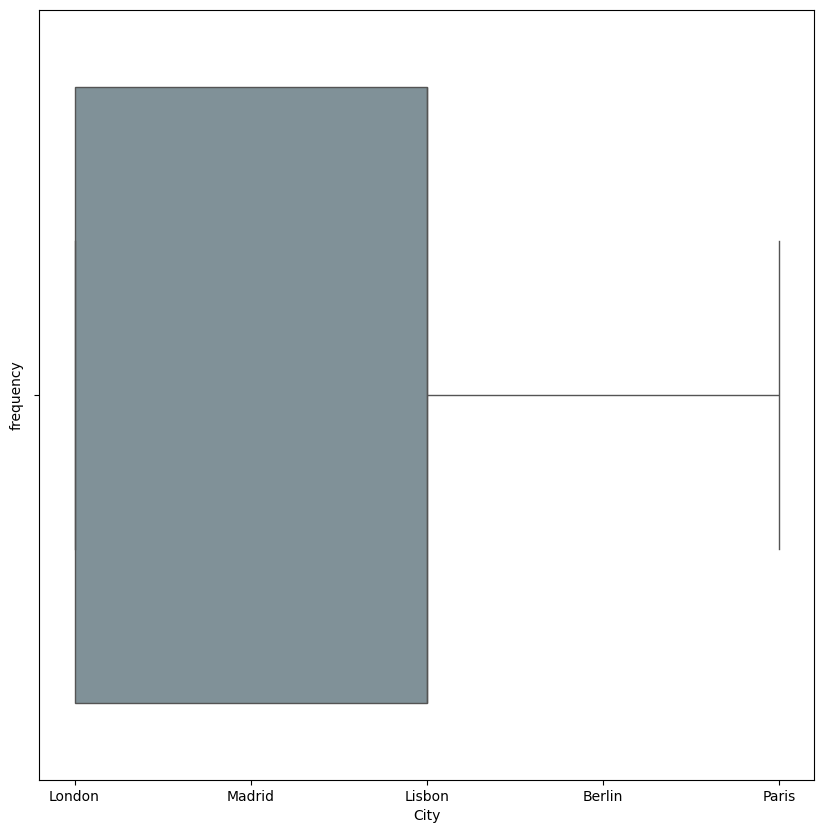

In [63]:
for i in ['Order ID', 'Date', 'Product', 'Price', 'Quantity', 'Purchase Type','Payment Method', 'Manager', 'City']:
    plt.figure(figsize=(10,10))
    sns.boxplot(data=data,x=i,color='#7C929C')
    
    plt.ylabel("frequency")
    plt.show()

#### SCATTER PLOT to understand the relationships between the data 

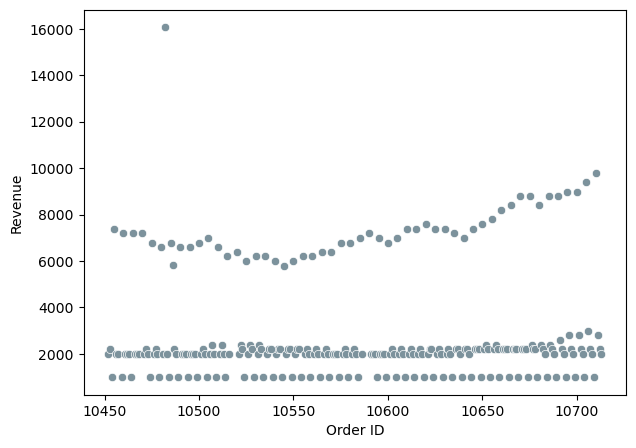

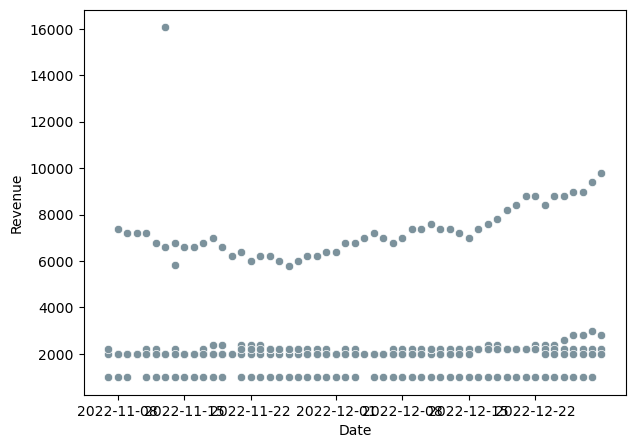

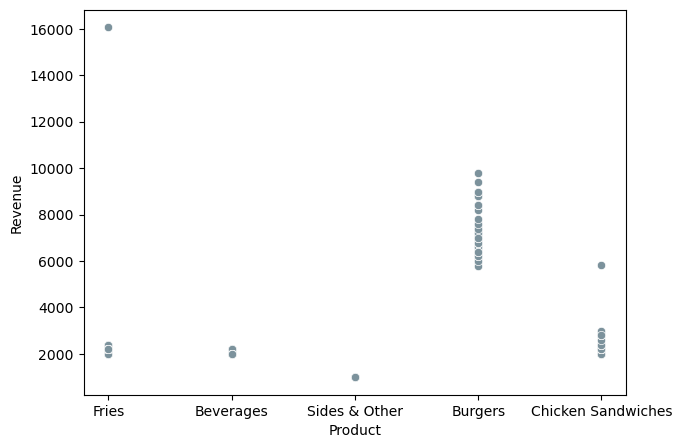

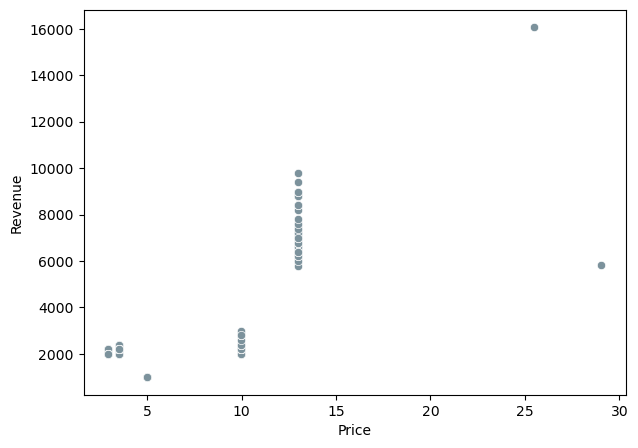

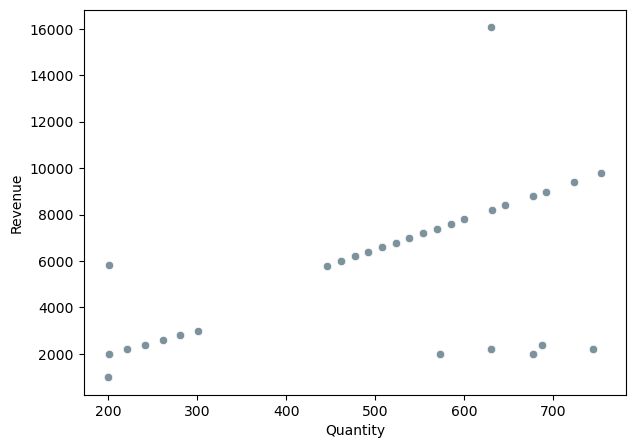

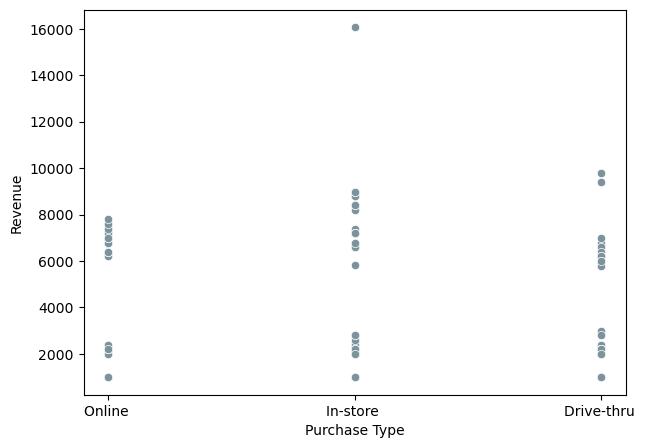

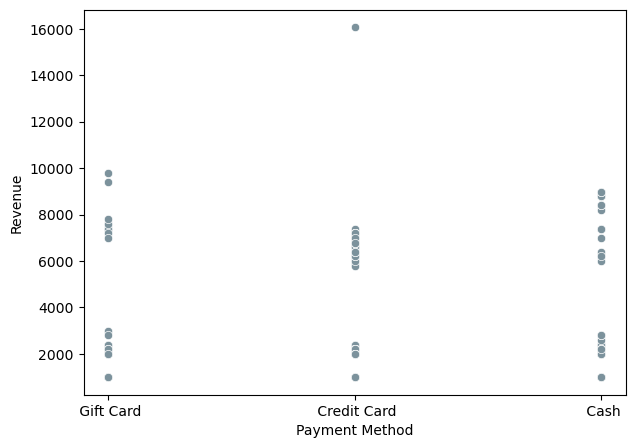

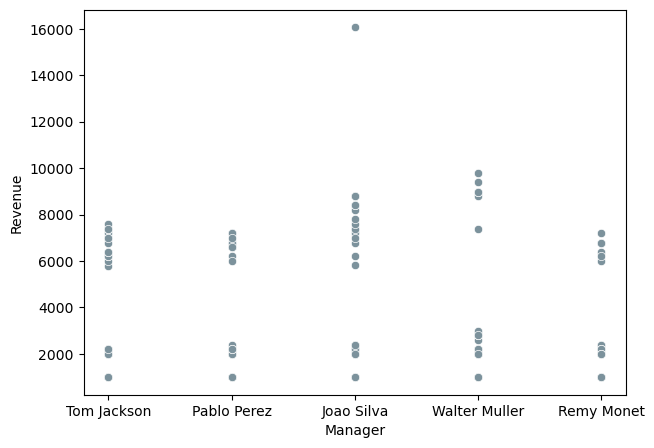

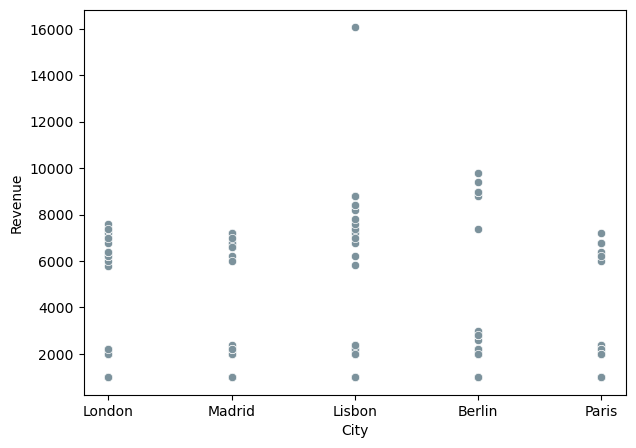

In [68]:
for i in ['Order ID', 'Date', 'Product', 'Price', 'Quantity', 'Purchase Type','Payment Method', 'Manager', 'City']:
    plt.figure(figsize=(7,5))
    sns.scatterplot(data=data,x=i,color='#7C929C',y='Revenue')
    
    plt.ylabel("Revenue")
    plt.show()

### HEAT MAP TO SHOW THE CORRELATION BETWEEN METRIX

In [69]:
corr_data=data.select_dtypes(include='number').corr()

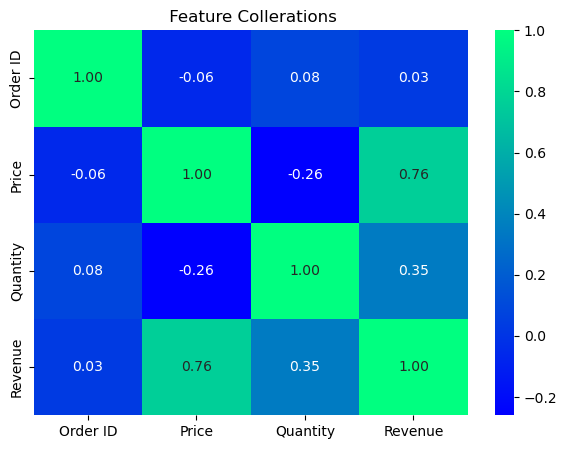

In [156]:
plt.figure(figsize=(7,5))
sns.heatmap(corr_data,annot=True,
    fmt=".2f",
    cmap="winter",
    cbar=True)
plt.title(" Feature Collerations")
plt.show()

# DATA ANALYSIS AND VISUALIZATIONS

## Q.1) What was the Most Preferred Payment Method ?


In [72]:
data.head(1)

,Order ID,Date,Product,Price,Quantity,Purchase Type,Payment Method,Manager,City,Revenue
0,10452,2022-11-07,Fries,3.49,573,Online,Gift Card,Tom Jackson,London,1999.77


In [73]:
data['Payment Method'].unique()

array([' Gift Card', ' Credit Card', ' Cash'], dtype=object)

In [79]:
data['Payment Method'].value_counts()

Payment Method
Credit Card    120
Cash            76
Gift Card       58
Name: count, dtype: int64

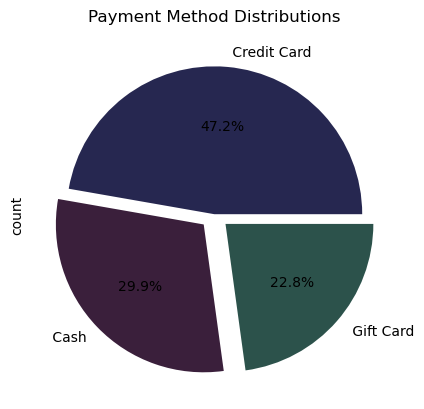

In [84]:
data['Payment Method'].value_counts().plot(kind='pie',colors=['#262750','#3a1f3b','#2c524b'],autopct="%1.1f%%",explode=[0, 0.1, 0.1])
plt.title('Payment Method Distributions')
plt.show()

## Q.2) Which one was the Most Selling Product By Quantity & Revenue

In [108]:

product_per_quantity=data.groupby('Product')['Quantity'].sum().sort_values(ascending= True)
product_per_quantity




Product
Sides & Other          9800
Chicken Sandwiches    11132
Burgers               28996
Fries                 32016
Beverages             34938
Name: Quantity, dtype: int64

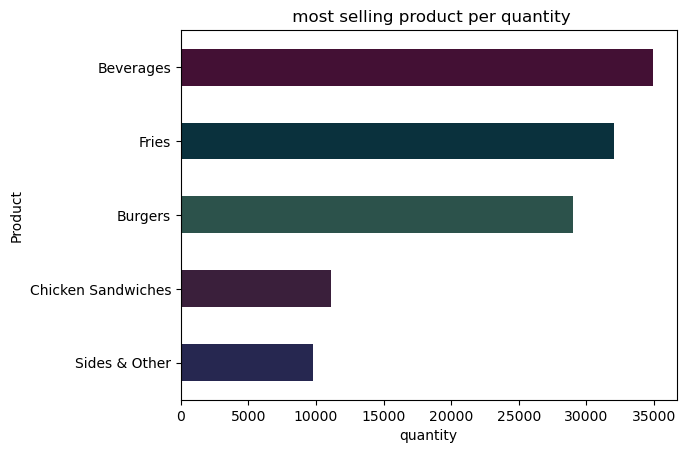

In [109]:
product_per_quantity.plot(kind='barh',x=product_per_quantity.index,y=product_per_quantity.values,color=['#262750','#3a1f3b','#2c524b','#0a313d','#431034'])
plt.xlabel("quantity")
plt.title(" most selling product per quantity")
plt.show()

In [97]:
data.head(1)

,Order ID,Date,Product,Price,Quantity,Purchase Type,Payment Method,Manager,City,Revenue
0,10452,2022-11-07,Fries,3.49,573,Online,Gift Card,Tom Jackson,London,1999.77


In [98]:
product_per_revenue=data.groupby('Product')['Revenue'].sum().sort_values(ascending= True)
product_per_revenue

Product
Sides & Other          48902.00
Beverages             103067.10
Chicken Sandwiches    114602.50
Fries                 125602.14
Burgers               376658.04
Name: Revenue, dtype: float64

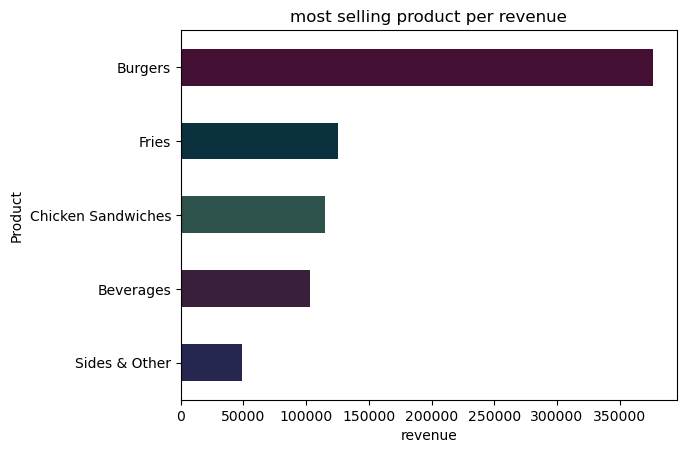

In [103]:
product_per_revenue.plot(kind='barh',x=product_per_revenue.index,y=product_per_revenue.values,color=['#262750','#3a1f3b','#2c524b','#0a313d','#431034'])
plt.xlabel("revenue")
plt.title("most selling product per revenue")
plt.show()

## Q.3) Which City had maximum revenue, or, Which Manager earned maximum revenue ?

In [110]:
data.head(1)

,Order ID,Date,Product,Price,Quantity,Purchase Type,Payment Method,Manager,City,Revenue
0,10452,2022-11-07,Fries,3.49,573,Online,Gift Card,Tom Jackson,London,1999.77


In [115]:
CITY_REVENUE=data.groupby('City')['Revenue'].sum().sort_values(ascending=False)

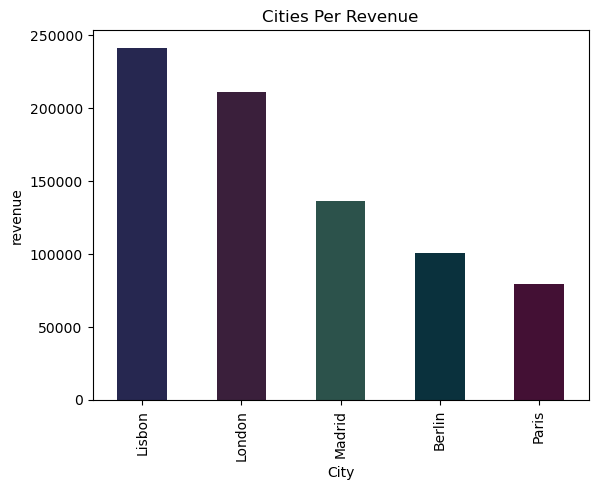

In [117]:
CITY_REVENUE.plot(kind='bar',x=CITY_REVENUE.index,y=CITY_REVENUE.values ,color=['#262750','#3a1f3b','#2c524b','#0a313d','#431034'])
plt.title("Cities Per Revenue")
plt.ylabel("revenue")
plt.show()

In [118]:
Manager_REVENUE=data.groupby('Manager')['Revenue'].sum().sort_values(ascending=False)

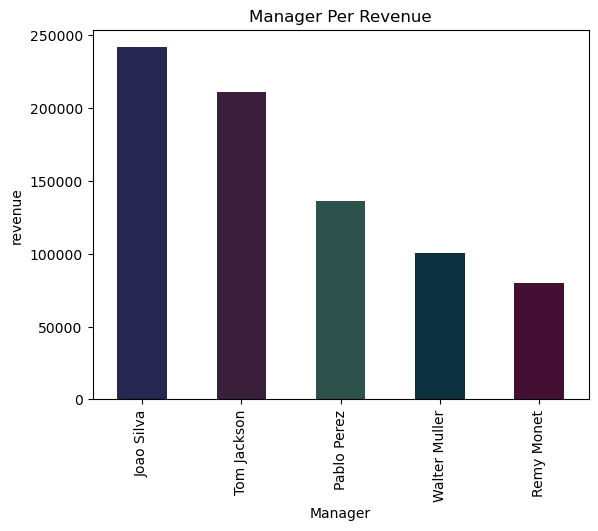

In [119]:
Manager_REVENUE.plot(kind='bar',x=Manager_REVENUE.index,y=Manager_REVENUE.values ,color=['#262750','#3a1f3b','#2c524b','#0a313d','#431034'])
plt.title("Manager Per Revenue")
plt.ylabel("revenue")
plt.show()

## Q.4) Show the Date wise revenue.

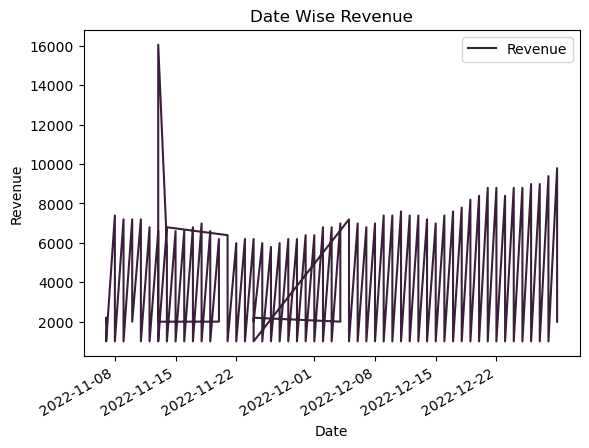

In [126]:
data.plot('Date','Revenue',color='#3a1f3b')
plt.title("Date Wise Revenue")
plt.ylabel("Revenue")
plt.show()

## Q.5) What was the Average Revenue ?

In [128]:
data.Revenue.mean()

np.float64(3026.8967716535435)

## Q.6) What was the Average Revenue of November & December month ?

In [134]:
data['month']=data['Date'].dt.month

In [ ]:
data('month')

In [135]:
nov=data[data['month']==11]

In [136]:
nov

,Order ID,Date,Product,Price,Quantity,Purchase Type,Payment Method,Manager,City,Revenue,month
0,10452,2022-11-07,Fries,3.49,573,Online,Gift Card,Tom Jackson,London,1999.77,11
1,10453,2022-11-07,Beverages,2.95,745,Online,Gift Card,Pablo Perez,Madrid,2197.75,11
2,10454,2022-11-07,Sides & Other,4.99,200,In-store,Gift Card,Joao Silva,Lisbon,998.00,11
3,10455,2022-11-08,Burgers,12.99,569,In-store,Credit Card,Walter Muller,Berlin,7391.31,11
4,10456,2022-11-08,Chicken Sandwiches,9.95,201,In-store,Credit Card,Walter Muller,Berlin,1999.95,11
...,...,...,...,...,...,...,...,...,...,...,...
108,10568,2022-11-30,Beverages,2.95,677,Online,Credit Card,Tom Jackson,London,1997.15,11
109,10569,2022-11-30,Sides & Other,4.99,200,Online,Credit Card,Tom Jackson,London,998.00,11
127,10537,2022-11-24,Fries,3.49,630,Drive-thru,Credit Card,Pablo Perez,Madrid,2198.70,11
128,10538,2022-11-24,Beverages,2.95,745,Drive-thru,Credit Card,Pablo Perez,Madrid,2197.75,11


In [137]:
nov.Revenue.mean()

np.float64(2936.6534513274337)

In [138]:
DEC=data[data['month']==12]

In [139]:
DEC.Revenue.mean()

np.float64(3099.2194326241133)

## Q.7) What was the  Standard Deviation of Revenue and Quantity ?

In [129]:
data.Revenue.std()

2418.1931282105456

In [130]:
data.Quantity.std()

214.69197583196447

## Q.8) What was the Variance of Revenue and Quantity ?

In [131]:
data.Revenue.var()

5847658.005324705

In [132]:
data.Quantity.var()

46092.64448663282

## Q.9) Was the revenue increasing or decreasing over the time?

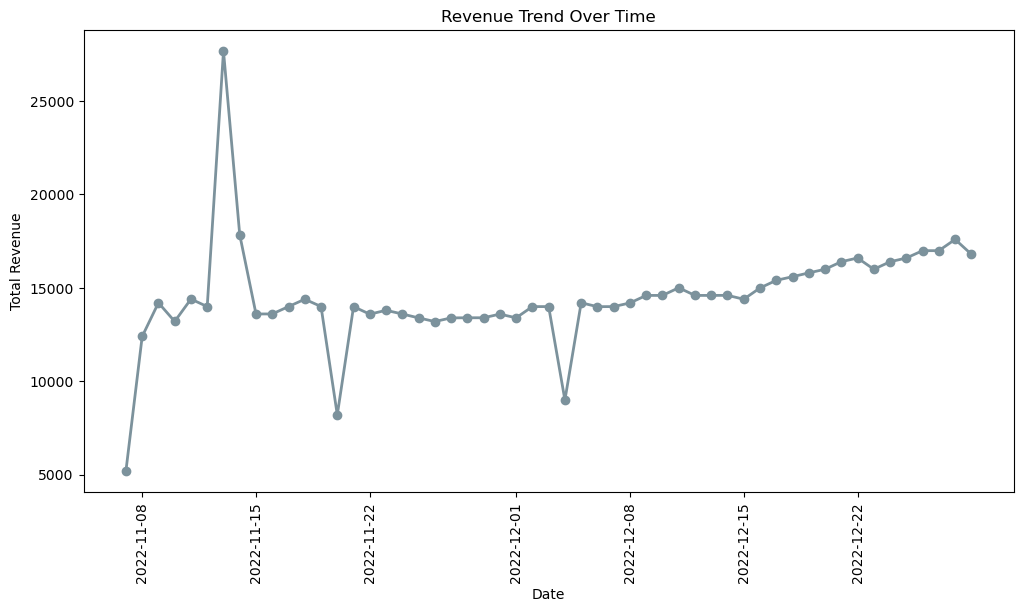

In [151]:
# 1. Group by date and calculate revenue
revenue_trend = (
    data.groupby("Date")["Revenue"]
    .sum()
    .reset_index()
    .sort_values(by="Date")  
)


plt.figure(figsize=(12,6))
plt.plot(revenue_trend["Date"], revenue_trend["Revenue"], marker="o", color="#7C929C", linewidth=2)
plt.title("Revenue Trend Over Time")
plt.xlabel("Date")
plt.ylabel("Total Revenue")
plt.xticks(rotation=90)   # rotate dates for readability


plt.show()


## Q.10) What was the Average 'Quantity Sold' & 'Average Revenue' for each product ?

In [155]:
data.groupby('Product')[['Quantity','Revenue']].agg({'Quantity':'mean','Revenue':'mean'})

,Quantity,Revenue
Product,,
Beverages,698.760000,2061.342000
Burgers,557.615385,7243.423846
Chicken Sandwiches,214.076923,2203.894231
Fries,627.764706,2462.787059
Sides & Other,200.000000,998.000000
